In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Reshape, Dropout, Flatten, AveragePooling2D, BatchNormalization, MaxPool2D, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

submission = pd.read_csv('submission.csv')
train_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')

x_train, y_train = train_dataset[[(str(i)) for i in range(784)]].astype(np.float), tf.one_hot(train_dataset['digit'].values,10)
x_train = x_train/255.0
x_test = test_dataset[[(str(i)) for i in range(784)]].astype(np.float)
x_test = x_test/255.0

#픽셀값이 5 미만인 값을 0으로 처리
#for i in range(784):
 #   train_dataset.loc[train_dataset[str(i)]<5, str(i)] = 0 #'0' ~ '784' 변수 까지 적용
  #  test_dataset.loc[test_dataset[str(i)]<5, str(i)] = 0 #prediction에만 쓰는 데이터


model = Sequential([
        Reshape((28,28,1), input_shape=(784,)), #28,28,1로 shape을 바꿈
        #conv-conv-maxpool-droput 층 반복         
        Conv2D(32, (2, 2), activation='relu',padding='valid'),
        Conv2D(32, (2, 2), activation='relu',padding='valid'),
        MaxPooling2D(2, 2),
        Dropout(0.3),

        Conv2D(64, (2, 2), activation='relu',padding='same'),
        Conv2D(64, (2, 2), activation='relu',padding='same'),
        MaxPooling2D(2, 2),    
        Dropout(0.3),    
        
        Conv2D(128, (2, 2), activation='relu',padding='same'),
        Conv2D(128, (2, 2), activation='relu',padding='same'),
        MaxPooling2D(pool_size = (2, 2)),
        Dropout(0.3),

        Flatten(),
        Dropout(0.5),
        Dense(128, activation = 'relu'),
        Dense(10, activation= 'softmax')
    ])
    
optimizer=Adam(lr=0.0005)
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics = ['acc'])

lowest_point = "final_model.ckpt"
lowest_loss = ModelCheckpoint(filepath=lowest_point, 
                            save_weights_only=True, 
                            save_best_only=True, 
                            monitor='val_loss', 
                            verbose=1)

hist = model.fit(x_train, y_train, epochs=150, validation_split=0.1, callbacks=[lowest_loss],batch_size=16,)
model.load_weights(lowest_point) #최적모형 불러오기 

aa= model.predict(x_test) #예측 



Epoch 1/150
108/116 [==========================>...] - ETA: 0s - loss: 2.3012 - acc: 0.1238
Epoch 00001: val_loss improved from inf to 2.29753, saving model to final_model.ckpt
116/116 [==============================] - 1s 7ms/step - loss: 2.2999 - acc: 0.1248 - val_loss: 2.2975 - val_acc: 0.1317
Epoch 2/150
113/116 [============================>.] - ETA: 0s - loss: 2.1338 - acc: 0.2212
Epoch 00002: val_loss improved from 2.29753 to 1.85737, saving model to final_model.ckpt
116/116 [==============================] - 0s 4ms/step - loss: 2.1285 - acc: 0.2230 - val_loss: 1.8574 - val_acc: 0.3220
Epoch 3/150
113/116 [============================>.] - ETA: 0s - loss: 1.6801 - acc: 0.4242
Epoch 00003: val_loss improved from 1.85737 to 1.21955, saving model to final_model.ckpt
116/116 [==============================] - 1s 4ms/step - loss: 1.6719 - acc: 0.4281 - val_loss: 1.2196 - val_acc: 0.6341
Epoch 4/150
113/116 [============================>.] - ETA: 0s - loss: 1.3491 - acc: 0.5503
Epoch 

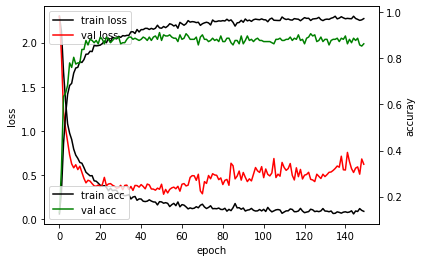

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

#loss, acc 그래프
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'black', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'black', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()